In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn


In [ ]:
pip install pycaret[full]


     |████████████████████████████████| 288 kB 5.2 MB/s 
     |████████████████████████████████| 1.7 MB 54.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 20.9 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 167 kB 67.3 MB/s 
     |████████████████████████████████| 113 kB 62.0 MB/s 
     |████████████████████████████████| 1.3 MB 56.5 MB/s 
     |████████████████████████████████| 261 kB 49.0 MB/s 
     |████████████████████████████████| 6.8 MB 60.1 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 15.5 MB 24.3 MB/s 
     |████████████████████████████████| 40 kB 5.3 MB/s 
     |████████████████████████████████| 57.6 MB 1.2 MB/s 
     |████████████████████████████████| 308 kB 52.5 MB/s 
     |███████████████████

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Titanic/test.csv")
other = pd.read_csv("/content/drive/MyDrive/Titanic/gender_submission.csv")

In [4]:
df = pd.concat([train, test, other])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [67]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,762.828025,0.286045,1.739433,811.057325,0.972206,18.098246,0.378112,0.291836,576.264042,25.217421,170.763173,0.972206
std,385.032264,0.452042,1.224211,431.824753,0.715118,18.416132,0.931642,0.771342,313.610248,47.248779,39.928790,0.715118
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,432.500000,0.000000,1.000000,430.500000,0.000000,0.000000,0.000000,0.000000,285.500000,0.000000,186.000000,0.000000
50%,864.000000,0.000000,2.000000,861.000000,1.000000,18.000000,0.000000,0.000000,632.000000,8.662500,186.000000,1.000000
75%,1093.500000,1.000000,3.000000,1292.500000,1.000000,31.000000,0.000000,0.000000,923.000000,26.000000,186.000000,1.000000
max,1309.000000,1.000000,3.000000,1307.000000,2.000000,80.000000,8.000000,9.000000,929.000000,512.329200,186.000000,2.000000


In [68]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.193571,-0.417671,0.308215,0.409411,-0.261057,-0.159665,-0.098552,0.301508,-0.124371,0.096453,0.409411
Survived,-0.193571,1.000000,-0.201306,0.037833,-0.120566,-0.050169,-0.034101,0.024647,-0.022177,0.111050,-0.138541,-0.120566
Pclass,-0.417671,-0.201306,1.000000,-0.499545,-0.609189,0.242998,0.219528,0.182427,-0.368202,-0.075114,0.219517,-0.609189
Name,0.308215,0.037833,-0.499545,1.000000,0.543727,-0.420579,-0.148982,-0.165347,0.436696,-0.223580,0.181784,0.543727
Sex,0.409411,-0.120566,-0.609189,0.543727,1.000000,-0.451450,-0.248583,-0.295140,0.527635,-0.348393,0.234938,1.000000
Age,-0.261057,-0.050169,0.242998,-0.420579,-0.451450,1.000000,0.018610,0.086358,-0.413990,0.336841,-0.365579,-0.451450
SibSp,-0.159665,-0.034101,0.219528,-0.148982,-0.248583,0.018610,1.000000,0.404273,-0.097832,0.218090,-0.040220,-0.248583
Parch,-0.098552,0.024647,0.182427,-0.165347,-0.295140,0.086358,0.404273,1.000000,-0.095713,0.271005,-0.077271,-0.295140
Ticket,0.301508,-0.022177,-0.368202,0.436696,0.527635,-0.413990,-0.097832,-0.095713,1.000000,-0.202864,0.299014,0.527635
Fare,-0.124371,0.111050,-0.075114,-0.223580,-0.348393,0.336841,0.218090,0.271005,-0.202864,1.000000,-0.551089,-0.348393


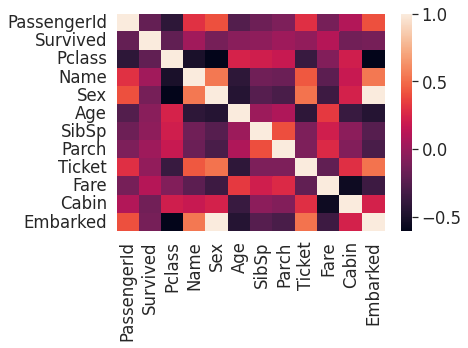

In [69]:
seaborn.heatmap(df.corr())

In [5]:
# Checking for null values

df.isnull().sum()

PassengerId       0
Survived        418
Pclass          418
Name            418
Sex             418
Age             681
SibSp           418
Parch           418
Ticket          418
Fare            419
Cabin          1432
Embarked        420
dtype: int64

In [6]:
# Removing duplicate entries if any

df.drop_duplicates(inplace = True)
print(df.shape)

(1727, 12)


In [8]:
# Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder() 
df['Name'] = label_encoder.fit_transform(df['Name'])

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,155,male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,286,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,523,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,422,female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,22,male,35.0,0.0,0.0,373450,8.0500,NaN,S
5,6,0.0,3.0,818,male,NaN,0.0,0.0,330877,8.4583,NaN,Q
6,7,0.0,1.0,767,male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8,0.0,3.0,914,male,2.0,3.0,1.0,349909,21.0750,NaN,S
8,9,1.0,3.0,605,female,27.0,0.0,2.0,347742,11.1333,NaN,S
9,10,1.0,2.0,847,female,14.0,1.0,0.0,237736,30.0708,NaN,C


In [9]:
label_encoder = LabelEncoder() 
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])
df['Embarked'] = label_encoder.fit_transform(df['Sex'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1727 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   float64
 3   Name         1727 non-null   int64  
 4   Sex          1727 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   float64
 7   Parch        1309 non-null   float64
 8   Ticket       1727 non-null   int64  
 9   Fare         1308 non-null   float64
 10  Cabin        1727 non-null   int64  
 11  Embarked     1727 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 175.4 KB


In [ ]:
df.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,155,1,22.0,1,0,720,7.2500,186,1
1,2,1.0,1,286,0,38.0,1,0,816,71.2833,106,0
2,3,1.0,3,523,0,26.0,0,0,914,7.9250,186,0
3,4,1.0,1,422,0,35.0,1,0,65,53.1000,70,0
4,5,0.0,3,22,1,35.0,0,0,649,8.0500,186,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.0,3,1126,1,0.0,0,0,711,8.0500,186,1
414,1306,0.0,1,891,0,39.0,0,0,834,108.9000,64,0
415,1307,0.0,3,1046,1,38.5,0,0,872,7.2500,186,1
416,1308,0.0,3,1227,1,0.0,0,0,579,8.0500,186,1


In [11]:
df.isnull().values.any()

True

In [12]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
df.fillna(0, inplace=True)


In [16]:
np.isnan(df).any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [17]:
df.shape

(1727, 12)

In [18]:
df['Survived'].value_counts()

0.0    1233
1.0     494
Name: Survived, dtype: int64

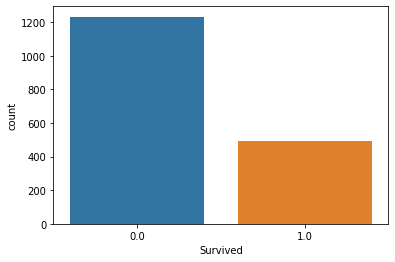

In [19]:
seaborn.countplot(df['Survived'])

In [20]:
msk = df['Survived'] == 1
num_to_oversample = len(df) - 2*msk.sum()
df_positive_oversample = df[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_oversample = pd.concat([df, df_positive_oversample])
df_oversample['Survived'].value_counts()

1.0    1233
0.0    1233
Name: Survived, dtype: int64

In [21]:
df_oversample['Survived'].value_counts()

1.0    1233
0.0    1233
Name: Survived, dtype: int64

In [22]:
x=df_oversample.drop('Survived',axis=1) #remove class atribute

In [23]:
from google.colab import files
df_oversample.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
df_oversample.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,728.091241,0.500000,1.623682,821.802109,0.937145,17.601014,0.365775,0.291971,575.223439,27.794681,168.427007,0.937145
std,381.183884,0.500101,1.214980,432.943591,0.763588,18.380212,0.848832,0.733930,323.795028,52.241210,41.839699,0.763588
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,391.000000,0.000000,0.000000,447.000000,0.000000,0.000000,0.000000,0.000000,259.000000,0.000000,186.000000,0.000000
50%,780.500000,0.500000,2.000000,869.000000,1.000000,17.000000,0.000000,0.000000,645.500000,9.587500,186.000000,1.000000
75%,1057.750000,1.000000,3.000000,1307.000000,2.000000,31.000000,1.000000,0.000000,929.000000,27.000000,186.000000,2.000000
max,1309.000000,1.000000,3.000000,1307.000000,2.000000,80.000000,8.000000,9.000000,929.000000,512.329200,186.000000,2.000000


In [65]:
df_oversample.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.214898,-0.464595,0.366778,0.514779,-0.290543,-0.183737,-0.126351,0.370587,-0.155020,0.125815,0.514779
Survived,-0.214898,1.000000,-0.223666,0.048706,-0.117389,-0.058873,-0.038226,0.016579,-0.016809,0.112912,-0.139527,-0.117389
Pclass,-0.464595,-0.223666,1.000000,-0.507089,-0.617577,0.252187,0.227929,0.198333,-0.381341,-0.065234,0.200534,-0.617577
Name,0.366778,0.048706,-0.507089,1.000000,0.556119,-0.413290,-0.201171,-0.204751,0.455780,-0.263719,0.208990,0.556119
Sex,0.514779,-0.117389,-0.617577,0.556119,1.000000,-0.482611,-0.256808,-0.293712,0.558117,-0.333678,0.246826,1.000000
Age,-0.290543,-0.058873,0.252187,-0.413290,-0.482611,1.000000,0.047551,0.083256,-0.415185,0.342527,-0.389871,-0.482611
SibSp,-0.183737,-0.038226,0.227929,-0.201171,-0.256808,0.047551,1.000000,0.386573,-0.137195,0.201903,-0.047646,-0.256808
Parch,-0.126351,0.016579,0.198333,-0.204751,-0.293712,0.083256,0.386573,1.000000,-0.148529,0.238868,-0.080263,-0.293712
Ticket,0.370587,-0.016809,-0.381341,0.455780,0.558117,-0.415185,-0.137195,-0.148529,1.000000,-0.204283,0.329487,0.558117
Fare,-0.155020,0.112912,-0.065234,-0.263719,-0.333678,0.342527,0.201903,0.238868,-0.204283,1.000000,-0.583015,-0.333678


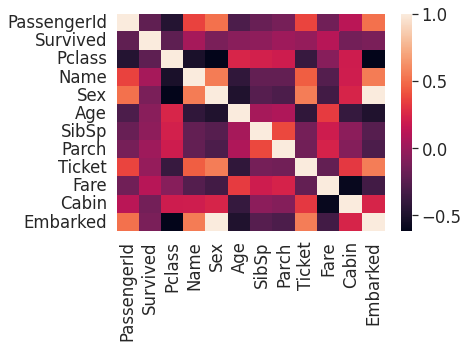

In [66]:
seaborn.heatmap(df_oversample.corr())

In [24]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3.0,155,1,22.0,1.0,0.0,720,7.2500,186,1
1,2,1.0,286,0,38.0,1.0,0.0,816,71.2833,106,0
2,3,3.0,523,0,26.0,0.0,0.0,914,7.9250,186,0
3,4,1.0,422,0,35.0,1.0,0.0,65,53.1000,70,0
4,5,3.0,22,1,35.0,0.0,0.0,649,8.0500,186,1
...,...,...,...,...,...,...,...,...,...,...,...
432,433,2.0,726,0,42.0,1.0,0.0,856,26.0000,186,0
111,1003,0.0,1307,2,0.0,0.0,0.0,929,0.0000,186,2
430,431,1.0,129,1,28.0,0.0,0.0,5,26.5500,92,1
122,1014,0.0,1307,2,0.0,0.0,0.0,929,0.0000,186,2


In [25]:
y=df_oversample['Survived']

In [26]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
432    1.0
111    1.0
430    1.0
122    1.0
175    1.0
Name: Survived, Length: 2466, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
xtrain = xtrain.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc=DecisionTreeClassifier()

In [32]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [33]:
dtc.score(xtest,ytest)

0.888663967611336

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, plot_roc_curve

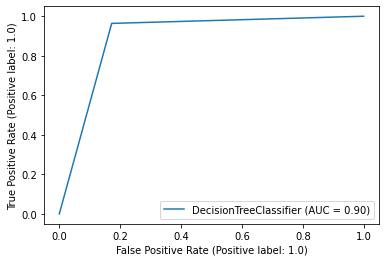

In [35]:
plot_roc_curve(dtc, xtest, ytest);

In [36]:
y_pred=dtc.predict(xtest)

In [37]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

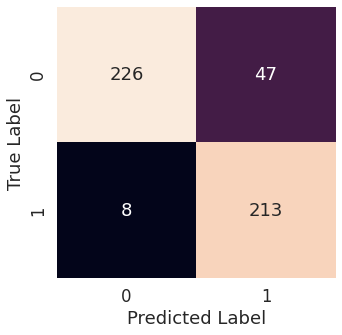

In [38]:
conf_matrix(ytest,y_pred)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
neighbors_settings=range(1,26) #KNN 25 times
for n_neighbors in neighbors_settings:
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(xtrain,ytrain)

In [41]:
neighbors_settings=range(1,26) #KNN 25 times
for n_neighbors in neighbors_settings:
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(xtrain,ytrain)

In [42]:
knn.score(xtest,ytest)

0.7044534412955465

In [43]:
y_pred=knn.predict(xtest)

In [44]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

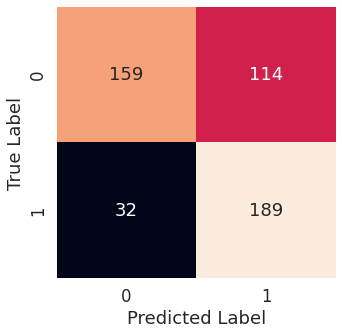

In [45]:
conf_matrix(ytest,y_pred)

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [47]:
lr_y_pred = lr.predict(xtest)

In [48]:
lr.score(xtest,ytest)

0.6720647773279352

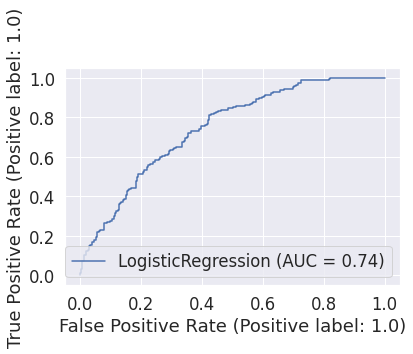

In [49]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, xtest, ytest)

In [50]:
y_pred=lr.predict(xtest)

In [51]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

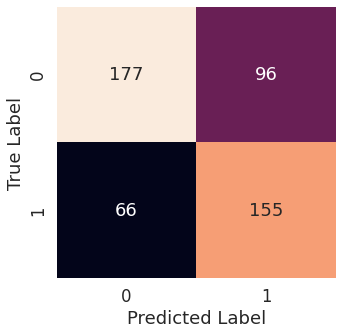

In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_matrix(ytest,y_pred)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc=RandomForestClassifier()  #create object

In [55]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [56]:
rfc.score(xtest,ytest)

0.8967611336032388

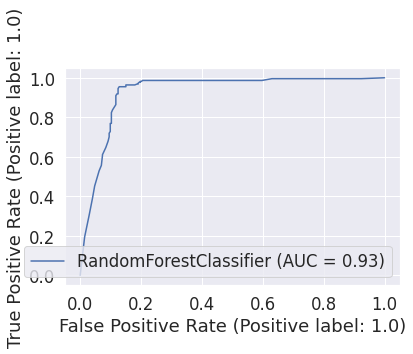

In [57]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc, xtest, ytest)

In [58]:
rfc_y_pred=rfc.predict(xtest)

In [59]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

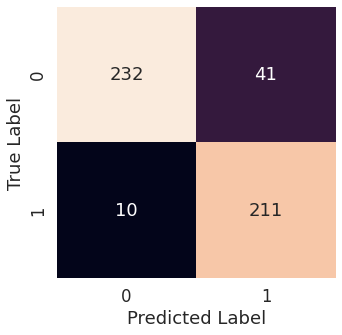

In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_matrix(ytest,rfc_y_pred)

In [61]:
print(classification_report(ytest,rfc_y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90       273
         1.0       0.84      0.95      0.89       221

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494

